# Analysis of Manchester united's official account's tweets from january till october 22

### This project analyzes manchester united's tweets from january till october 22

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data as manu_df
manu_df = pd.read_csv('manutd.csv')

In [3]:
# check data head
manu_df.head()

,date,num_likes,num_retweets,tweet_source,tweets
0,2022-10-19 18:57:33+00:00,701,83,Twitter for Advertisers,Revealed: the rationale behind tonight's team ...
1,2022-10-19 18:52:28+00:00,1444,149,Twitter for Advertisers,🏃‍♂️ @B_Fernandes8 leading the charge for warm...
2,2022-10-19 18:35:17+00:00,1760,225,Twitter Web App,Love an evening game at Old Trafford! 🌕\n\nWe'...
3,2022-10-19 18:15:11+00:00,14417,2721,Twitter for Advertisers,🚨 TEAM NEWS 🚨\n\n🔄 One change for the Reds as ...
4,2022-10-19 16:52:40+00:00,2416,235,Twitter Web App,Legends ❤️\n\n#PL matchday 10/38.\n\n#MUFC || ...


In [4]:
# check data info
manu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          5001 non-null   object
 1   num_likes     5001 non-null   int64 
 2   num_retweets  5001 non-null   int64 
 3   tweet_source  5001 non-null   object
 4   tweets        5001 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.5+ KB


In [5]:
# convert the date column to date time format
manu_df['date'] = pd.to_datetime(manu_df['date'])

In [6]:
# Check for missing rows
manu_df.isnull().sum()

date            0
num_likes       0
num_retweets    0
tweet_source    0
tweets          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

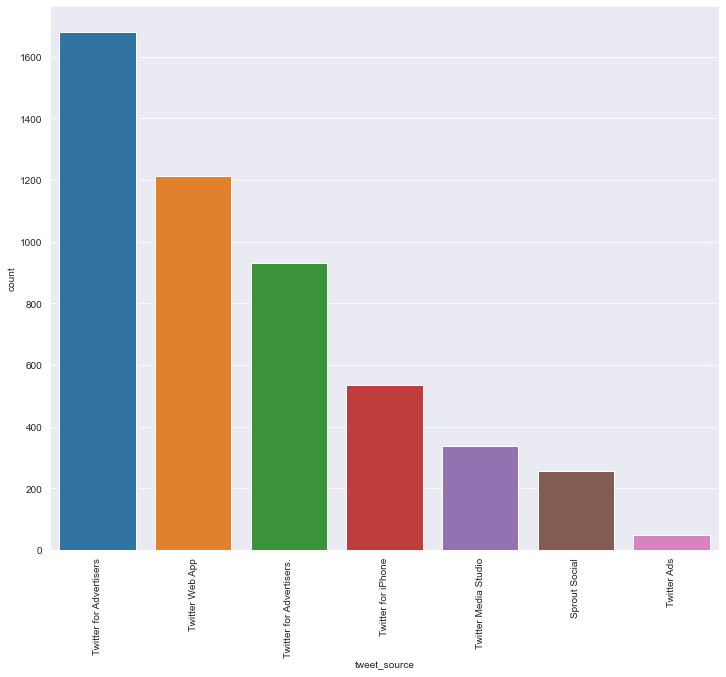

In [7]:
# Lets look at the source of most tweets
plt.figure(figsize = (12,10))
sns.set_style(style= 'darkgrid')
sns.countplot(x = manu_df['tweet_source'], order = manu_df['tweet_source'].value_counts().index)
plt.xticks(rotation = 90)
plt.show

### Most of the tweet source was 'Twitter for advertisers' with 'Twitter Ads' generating the least tweets.

In [8]:
# Lets explore the date column
manu_df['date']

0      2022-10-19 18:57:33+00:00
1      2022-10-19 18:52:28+00:00
2      2022-10-19 18:35:17+00:00
3      2022-10-19 18:15:11+00:00
4      2022-10-19 16:52:40+00:00
                  ...           
4996   2022-01-14 09:53:38+00:00
4997   2022-01-14 09:46:14+00:00
4998   2022-01-14 09:39:37+00:00
4999   2022-01-14 09:36:44+00:00
5000   2022-01-14 09:29:46+00:00
Name: date, Length: 5001, dtype: datetime64[ns, UTC]

### The dataset spans from 14 of january to 19th of october

In [9]:
manu_df['month'] = manu_df['date'].dt.month
manu_df['day_of_week'] = manu_df['date'].dt.dayofweek

In [10]:
# Map int to months
import calendar
manu_df['month'] = manu_df['month'].apply(lambda x: calendar.month_abbr[x])

In [11]:
# Let's see the month with the highest number of tweets
manu_df.groupby('month')['tweets'].count().sort_values(ascending = False)

month
Feb    656
Jul    617
Mar    611
Apr    586
May    512
Sep    495
Oct    431
Jan    421
Aug    384
Jun    288
Name: tweets, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

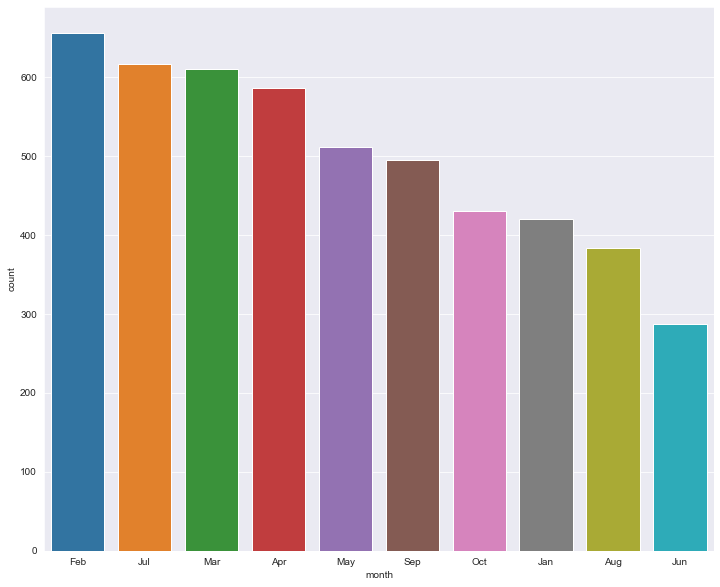

In [12]:
plt.figure(figsize = (12,10))
sns.set_style(style= 'darkgrid')
sns.countplot(x = manu_df['month'], order = manu_df['month'].value_counts().index)
plt.show

### The months of feb march april may were amongst the top 5 months with most tweets, with july being second because of the excitement from transfers and buzzing for the new season.  With june being the least because of the holidays.

In [13]:
# Lets create a column of tweet interaction, to see the tweets with the most interractions
manu_df['interractions'] = manu_df['num_likes'] + manu_df['num_retweets']

In [14]:
manu_df.sort_values(by = 'interractions', ascending= False).head(10)

,date,num_likes,num_retweets,tweet_source,tweets,month,day_of_week,interractions
2923,2022-04-21 10:10:09+00:00,257630,62999,Twitter for Advertisers,🇳🇱👔\n\nThe new First-Team Manager of Mancheste...,Apr,3,320629
1135,2022-08-19 19:15:53+00:00,249915,43562,Twitter for Advertisers,We are delighted to have reached an agreement ...,Aug,4,293477
255,2022-10-09 18:54:26+00:00,258076,31448,Twitter Web App,Astonishing. https://t.co/0UWTNQZm6U,Oct,6,289524
954,2022-08-30 12:00:15+00:00,197754,33988,Twitter for Advertisers,An agreement has been reached for the transfer...,Aug,1,231742
2920,2022-04-21 11:00:06+00:00,188754,24772,Twitter Web App,New beginnings.\n\n🔴⚪⚫ x 🔴⚪🔵\n\n#MUFC || #Welc...,Apr,3,213526
4520,2022-02-05 10:33:00+00:00,187214,21823,Twitter Media Studio,Wishing @Cristiano a happy birthday 🎊\n\n#MUFC...,Feb,5,209037
224,2022-10-10 13:53:33+00:00,178230,20111,Twitter for iPhone,"Congratulations, @Cristiano — from everyone at...",Oct,0,198341
2968,2022-04-18 18:52:15+00:00,178678,16372,Twitter for iPhone,"Your pain is our pain, @Cristiano 💔\n\nSending...",Apr,0,195050
1677,2022-07-15 14:00:03+00:00,158950,35646,Twitter for Advertisers,Christian Eriksen is a RED! ✍️🔴\n\n#MUFC || @C...,Jul,4,194596
1086,2022-08-22 20:54:00+00:00,166989,17126,Twitter for iPhone,aaaaaand breathe! 😅,Aug,0,184115


### The tweet with the most interractions yet in the year 2022 is Erik Ten Hags announcement on the 21st of april 2022, with tweets related to ronaldo making up 3 out of the top 10